Nama : Jonathan Christopher Gani  
NIM : 2702223084


# Dataset B

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from sklearn.preprocessing import OneHotEncoder
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
dataset = pd.read_csv('Dataset_B_hotel.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Dataset Information

Dataset B (Hotel)  
a. Booking_ID = Pengenal unik dari tiap pemesanan  
b. no_of_adults = Jumlah orang dewasa  
c. no_of_children = Jumlah anak kecil  
d. no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel  
e. no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel  
f. type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan  
g. required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1-Ya)  
h. room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels  
i. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan  
j. arrival_year = Tahun tanggal kedatangan  
k. arrival_month = Bulan tanggal kedatangan  
l. arrival_date = Tanggal kedatangan  
m. market_segment_type = Penunjukan segmen pasar  
n. repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1- Ya)  
o. no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini  
p. no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini  
q. avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)  
r. no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan
lain-lain.)  
s. booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.


In [ ]:
dataset.shape

(36275, 19)

In [ ]:
dataset.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Disini, saya membaca file csv dataset b, yang terdiri dari 36275 rows dan 19 kolom. Kemudian juga terdapat list dari nama-nama kolom dalam dataset, serta informasi singkat terkait data types dan missing value. Dapat dilihat terdapat beberapa missing values yakni pada kolom type_of_meal_plan, required_car_parking_space, avg_price_per_room. Sedangkan untuk data typesnya untuk semua kolom juga sudah sesuai.

In [ ]:
dataset["booking_status"].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


Disini, saya melihat distribusi dari label yang ingin di prediksi, dapat dilihat bahwa booking statusnya itu didominasi oleh yang Not_Canceled alias jadi booking. Dengan perbandingan 67.25 % : 32.75 %, alias terdapat kemungkinan data untuk cenderung lebih bias ke Not_Canceled (jadi booking).

## Splitting To Train and Test Data

In [ ]:
input_dataset=dataset.drop(['booking_status','Booking_ID'],axis=1)
output_dataset=dataset['booking_status']

In [ ]:
input_dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0


In [ ]:
output_dataset.head()

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled


Disini, saya terlebih dahulu memisahkan data ke 2 bagian, yakni data input (x) dan data output (y), dengan mendrop label (booking_status) dan kolom ID dari input (x) dan assign label ke output data. Kemudian dapat dilihat input dan output datanya sudah sesuai.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_dataset, output_dataset, test_size = 0.2, random_state = 42)

In [ ]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25629,2,1,2,1,Meal Plan 1,0.0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0
14473,2,1,1,1,Meal Plan 1,0.0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2
23720,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0
5843,2,0,2,5,Meal Plan 1,0.0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0
18709,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2,0,2,2,Meal Plan 1,0.0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2
6265,1,0,0,2,Meal Plan 2,0.0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0
11284,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1
860,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0


In [ ]:
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4968,2,1,1,0,Meal Plan 1,0.0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3
34540,2,0,1,2,Meal Plan 1,0.0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0
36108,2,0,2,2,Meal Plan 1,0.0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1
1553,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0
24974,2,1,0,2,Meal Plan 1,0.0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35781,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,190,2018,11,3,Online,0,0,0,90.90,0
12257,2,0,0,2,Meal Plan 1,0.0,Room_Type 4,0,2018,6,17,Offline,0,0,0,90.95,1
27212,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,30,2018,6,2,Offline,0,0,0,140.00,0
28097,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,39,2018,3,14,Offline,0,0,0,85.00,0


In [ ]:
y_train

,booking_status
25629,Not_Canceled
14473,Not_Canceled
23720,Canceled
5843,Not_Canceled
18709,Canceled
...,...
16850,Not_Canceled
6265,Canceled
11284,Not_Canceled
860,Canceled


In [ ]:
y_test

,booking_status
4968,Not_Canceled
34540,Not_Canceled
36108,Not_Canceled
1553,Canceled
24974,Not_Canceled
...,...
35781,Canceled
12257,Not_Canceled
27212,Not_Canceled
28097,Not_Canceled


Disini, saya melakukan splitting untuk training dan testing data sebesar 80 % train dan 20 % testing. Dapat dilihat proporsi antara x_train, x_test, y_train, y_test sudah sesuai dengan proporsi splitnya.

## Missing Values

### Outliers Checking

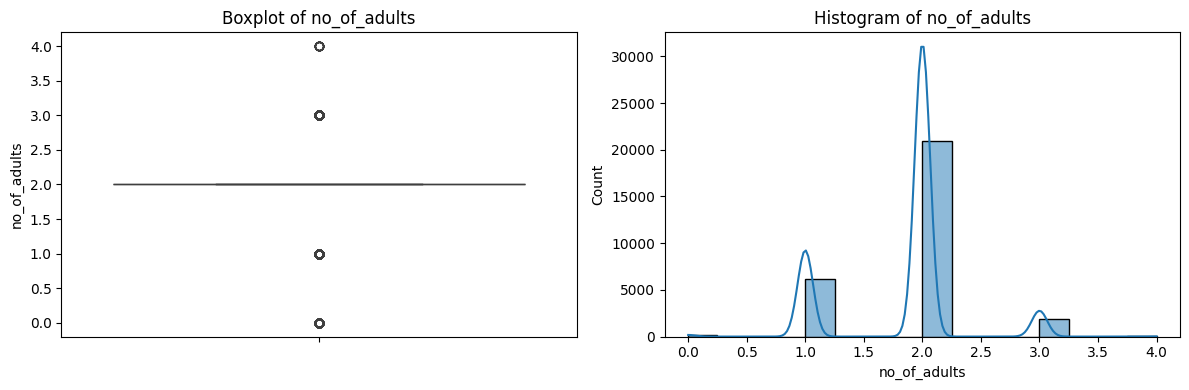

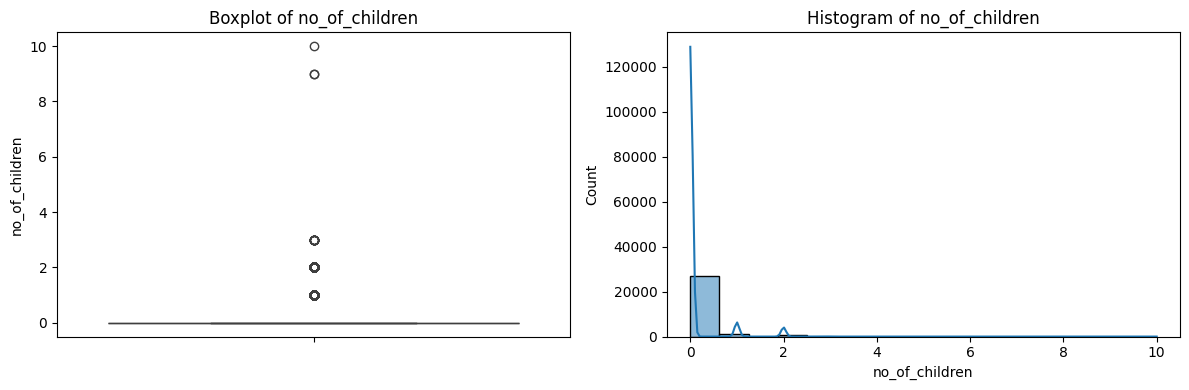

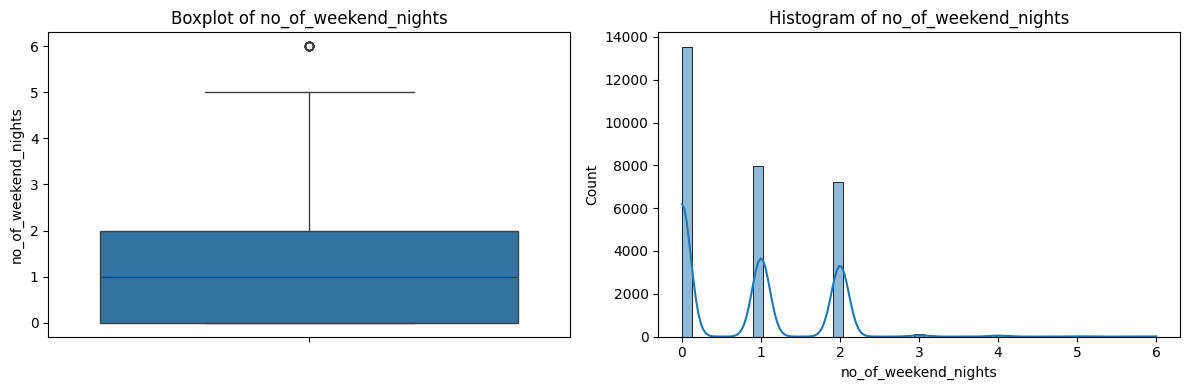

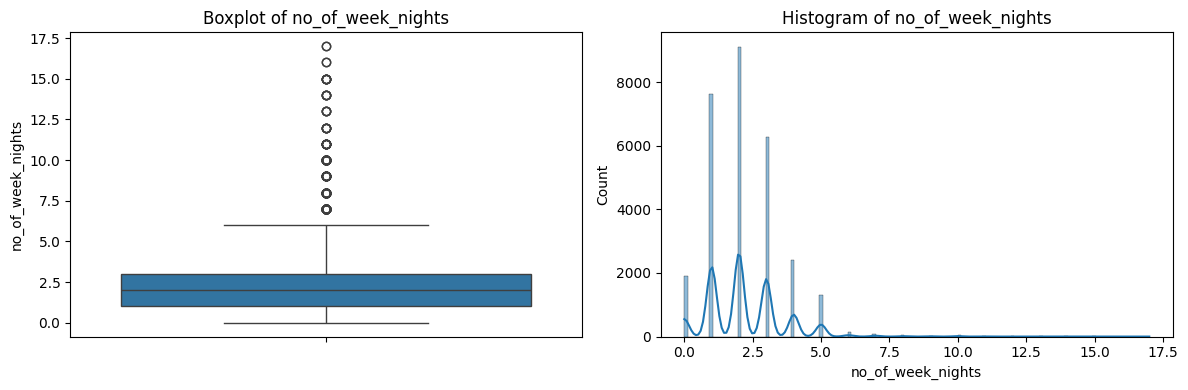

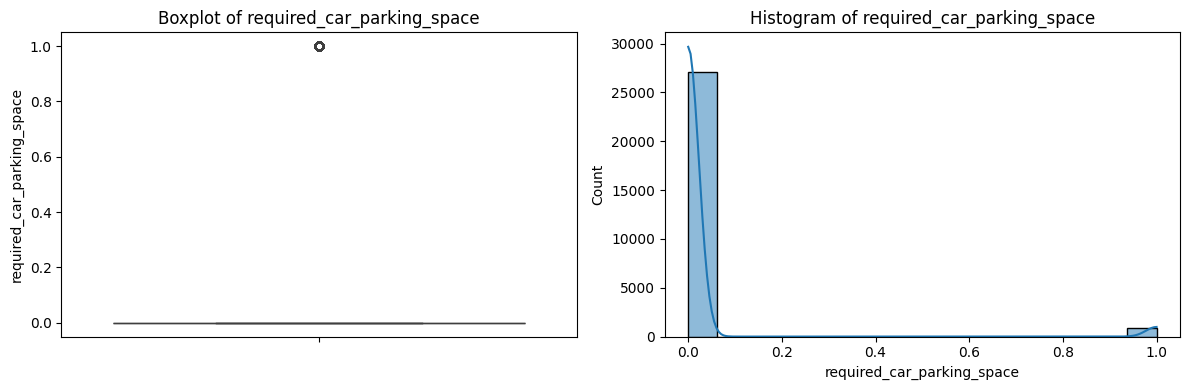

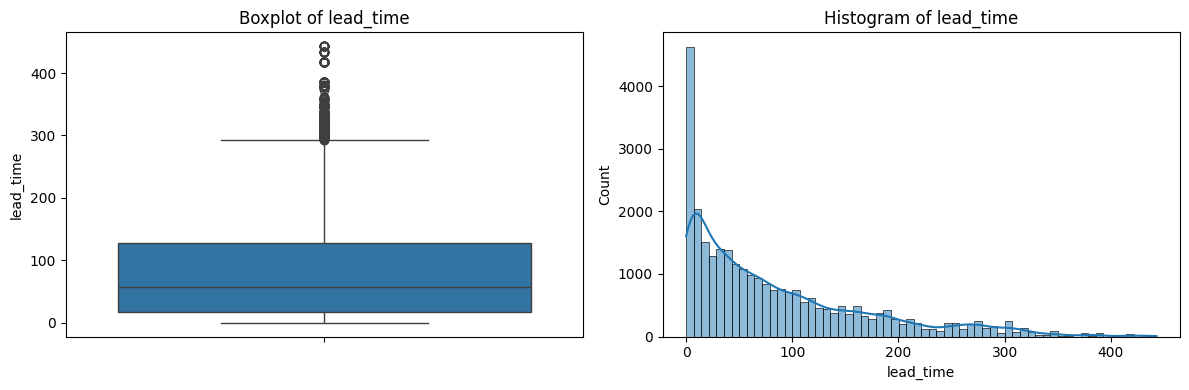

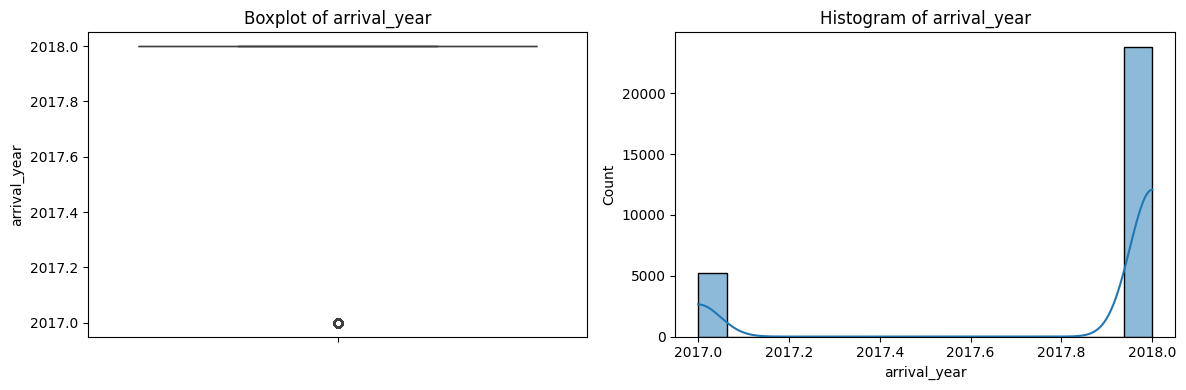

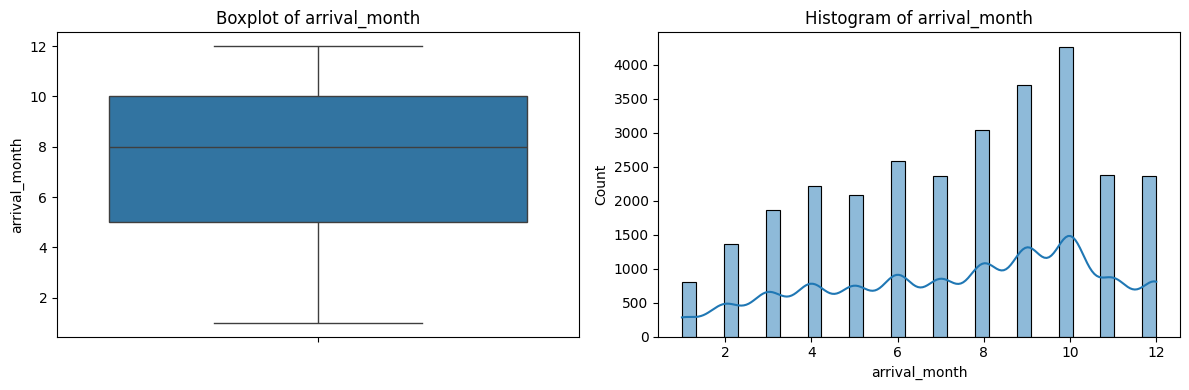

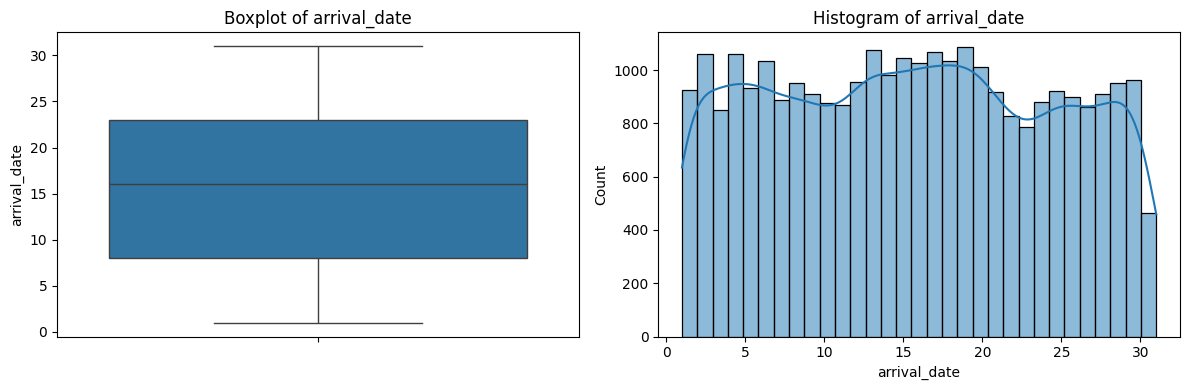

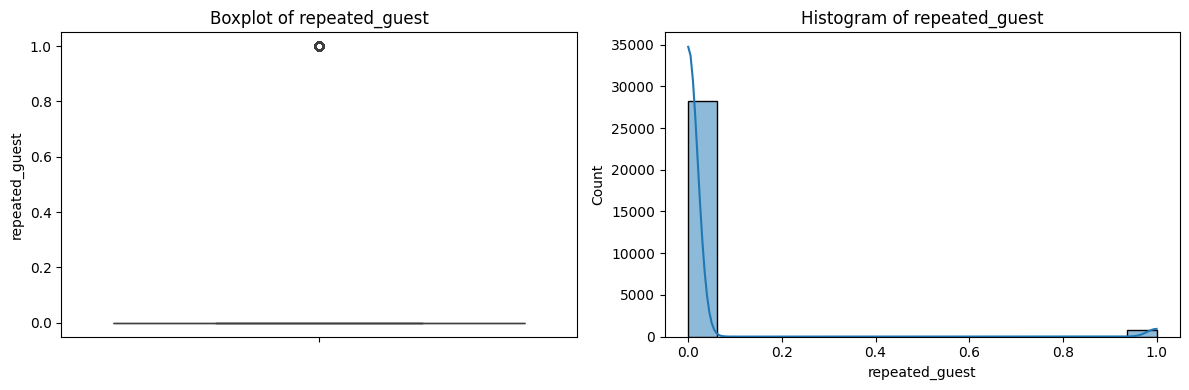

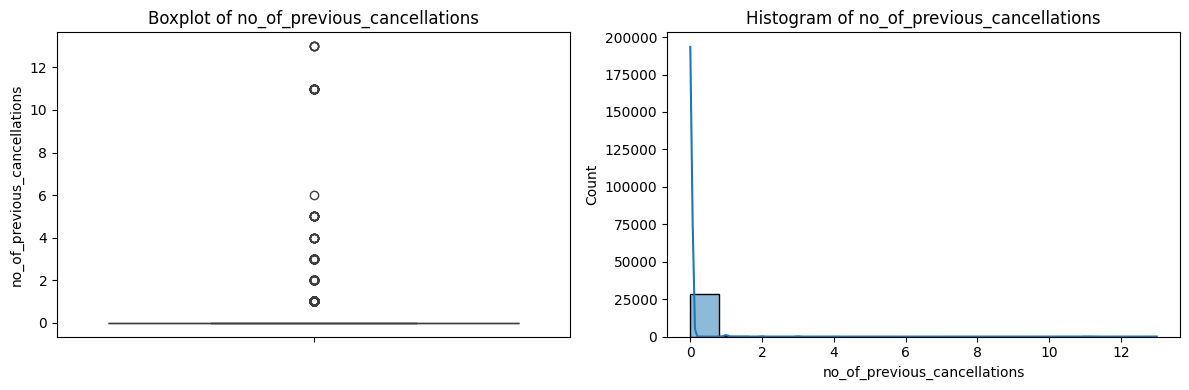

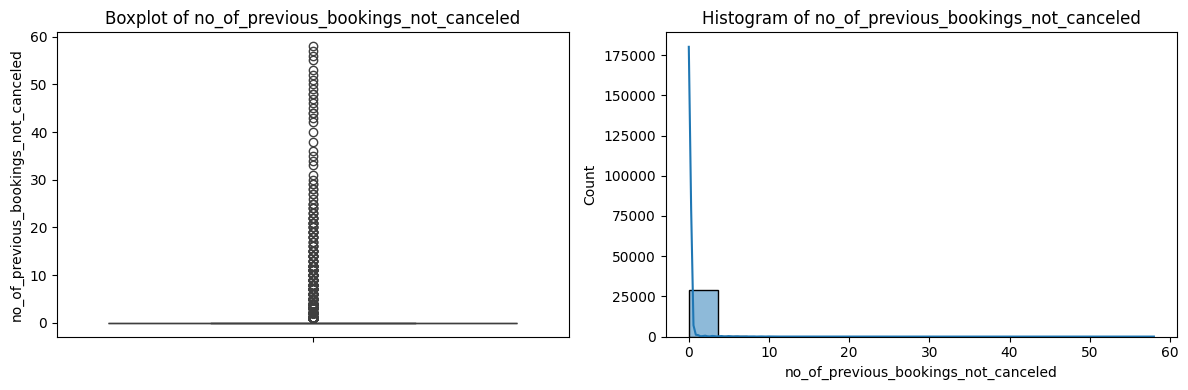

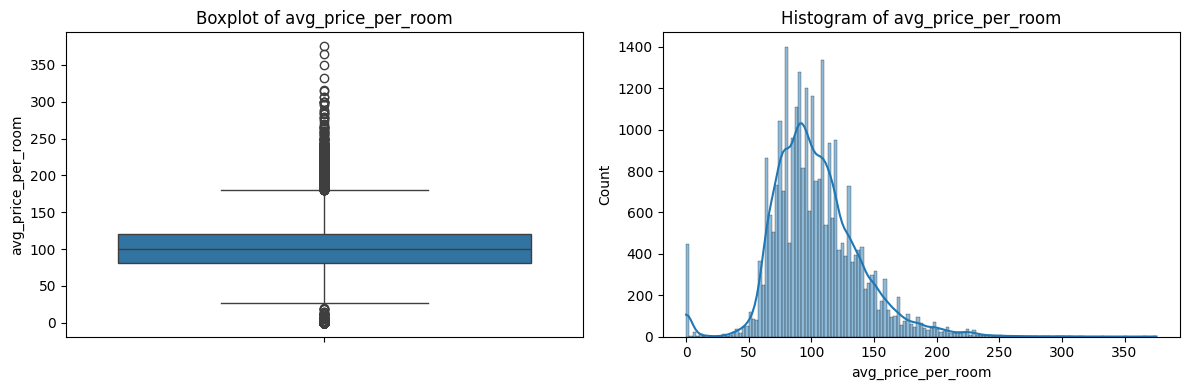

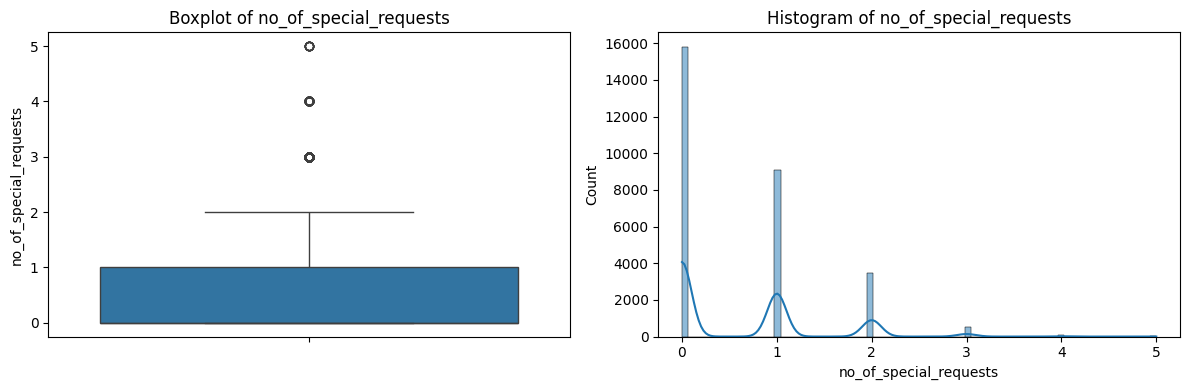

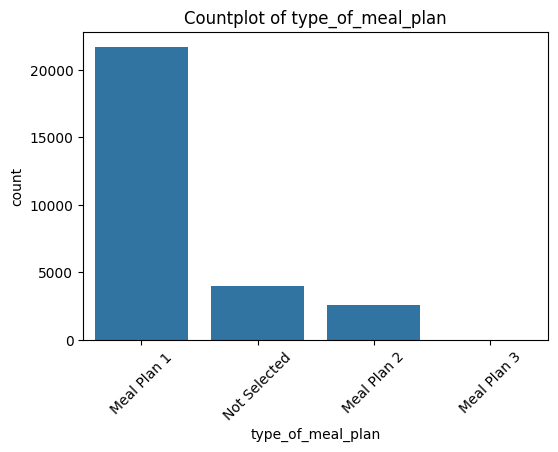

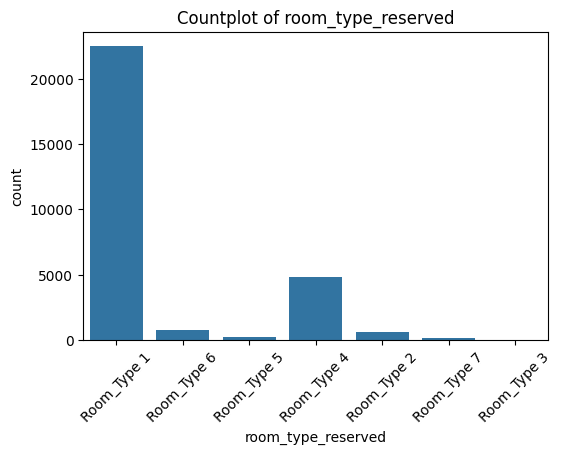

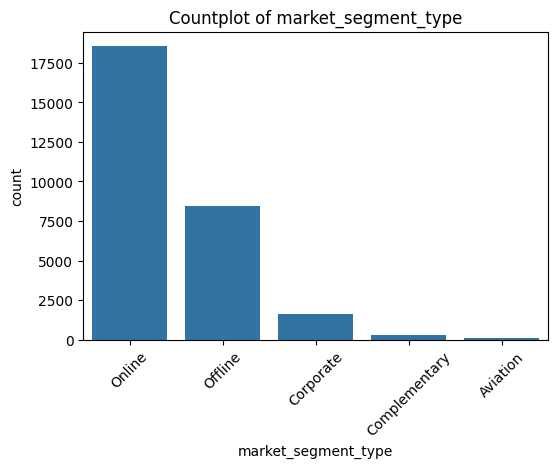

In [ ]:
# checking outliers using boxplot, histogram and count plot

for col in x_train.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=x_train[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(x_train[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

for col in x_train.select_dtypes(exclude=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=x_train[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

Disini, saya memvisualisasikan distribusi melalui boxplot, histogram, dan count plot, dapat dilihat memang hampir setiap kolom terdapat outlier, tapi disini menurut saya outliernya masih dalam batas normal dan masih dapat diterima, sehingga saya tidak melakukan handling outliers. Selain itu, distribusi dari tiap kolom diatas juga tidak ada yang normal.

### Handling Missing Values

In [ ]:
x_train.isna().sum()  # missing value x_train

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,736
required_car_parking_space,1039
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [ ]:
x_test.isna().sum() # missing value x_test

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,171
required_car_parking_space,231
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [ ]:
# calculate median
print('Median of required_car_parking_space:', np.median(x_train['required_car_parking_space']))
print('Median of avg_price_per_room:', np.median(x_train['avg_price_per_room']))

print("\n")

print('Median of required_car_parking_space:', np.median(x_train['required_car_parking_space'].dropna()))
print('Median of avg_price_per_room:', np.median(x_train['avg_price_per_room'].dropna()))


Median of required_car_parking_space: nan
Median of avg_price_per_room: nan


Median of required_car_parking_space: 0.0
Median of avg_price_per_room: 99.9


Disini, saya melakukan pengecekan missing value untuk setiap kolom di kedua data train dan test. Namun, karena distribusi data tiap kolom itu cenderung tidak normal dan banyak outlier, maka imputasi yang dilakukan adalah menggunakan median.  
Kemudian saya cek nilai mediannya dan ternyata Nan, sehingga saya mengexclude nilai na menggunakan dropna, baru cari nilai mediannya.

In [ ]:
# impute missing values using median for train and test
x_train["required_car_parking_space"].fillna(0, inplace=True)
x_train["avg_price_per_room"].fillna(99.9, inplace=True)

x_test["required_car_parking_space"].fillna(0, inplace=True)
x_test["avg_price_per_room"].fillna(99.9, inplace=True)

<ipython-input-19-b168c8bc61f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train["required_car_parking_space"].fillna(0, inplace=True)
<ipython-input-19-b168c8bc61f5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Kemudian saya assign nilai medianya ke fillna untuk ke data train dan test

In [ ]:
# calculate mode
print("The mode is :", sts.mode(x_train['type_of_meal_plan']))

The mode is : Meal Plan 1


In [ ]:
# impute missing values using mode for train and test
x_train["type_of_meal_plan"].fillna("Meal Plan 1", inplace=True)
x_test["type_of_meal_plan"].fillna("Meal Plan 1", inplace=True)

<ipython-input-21-11ad4a9fd913>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train["type_of_meal_plan"].fillna("Meal Plan 1", inplace=True)
<ipython-input-21-11ad4a9fd913>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Mengecek nilai modusnya yaitu Meal Plan 1, dan menginput nya ke data train dan test

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  float64
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_t

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7255 entries, 4968 to 6556
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          7255 non-null   int64  
 1   no_of_children                        7255 non-null   int64  
 2   no_of_weekend_nights                  7255 non-null   int64  
 3   no_of_week_nights                     7255 non-null   int64  
 4   type_of_meal_plan                     7255 non-null   object 
 5   required_car_parking_space            7255 non-null   float64
 6   room_type_reserved                    7255 non-null   object 
 7   lead_time                             7255 non-null   int64  
 8   arrival_year                          7255 non-null   int64  
 9   arrival_month                         7255 non-null   int64  
 10  arrival_date                          7255 non-null   int64  
 11  market_segment_type

Dapat dilihat bahwa missing value sudah berhasil ditangani dan tidak ada lagi.

## Duplicates

In [ ]:
# cek duplication
print("x_train duplication:", x_train.duplicated().sum())
print("x_test duplication:", x_test.duplicated().sum())
print("y_train duplication:", y_train.duplicated().sum())
print("y_test duplication:", y_test.duplicated().sum())

x_train duplication: 7346
x_test duplication: 1143
y_train duplication: 29018
y_test duplication: 7253


In [ ]:
# clean train duplicates
cleaned_train = pd.concat([x_train, y_train], axis=1).drop_duplicates()
x_train = cleaned_train.drop(columns="booking_status")
y_train = cleaned_train["booking_status"]

# clean test duplicates
cleaned_test = pd.concat([x_test, y_test], axis=1).drop_duplicates()
x_test = cleaned_test.drop(columns="booking_status")
y_test = cleaned_test["booking_status"]

In [ ]:
print("x_train duplication:", x_train.duplicated().sum())
print("x_test duplication:", x_test.duplicated().sum())
print("y_train duplication:", y_train.duplicated().sum())
print("y_test duplication:", y_test.duplicated().sum())

x_train duplication: 102
x_test duplication: 18
y_train duplication: 21774
y_test duplication: 6128


Jadi disini, saya cek dulu jumlah duplikasi dari x y train test, nah tapi disini tidak bisa langsung drop, karena jika langsung drop, pas modelling itu otomatis modelnya akan agak hancur karena akan banyak data yang hilang. Solusinya disini saya menggabungkan lagi antar x y train dan x y test menjadi 1, mirip seperti dataset utama, lalu drop duplikasinya biar sesuai x dan y nya, jadi ga ada data yang hilang pas training model. Sisa duplikasinya itu karena di split lagi, tapi aslinya sudah berhasil mengatasi duplikasi.

## Encoding

In [ ]:
cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]

for cols in cat_cols:
    print(dataset[cols].value_counts(), "\n")

type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 



Melihat isi attribut dari masing-masing kolom categorical. Dari semua kolom kategorikal, dapat kita ketahui bahwa semuanya bertipe data nominal.

In [ ]:
one_hot_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

one_hot_encoding = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# fit transform x_train
nom_cols_encoded_train = one_hot_encoding.fit_transform(x_train[one_hot_cols])
train_one_hot_encoded = pd.DataFrame(nom_cols_encoded_train,
                                 columns=one_hot_encoding.get_feature_names_out(one_hot_cols),
                                 index=x_train.index)

# transform x_test
nom_cols_encoded_test = one_hot_encoding.transform(x_test[one_hot_cols])
test_one_hot_encoded = pd.DataFrame(nom_cols_encoded_test,
                                columns=one_hot_encoding.get_feature_names_out(one_hot_cols),
                                index=x_test.index)

x_train_encoded = pd.concat([x_train.drop(columns=one_hot_cols), train_one_hot_encoded], axis=1)
x_test_encoded = pd.concat([x_test.drop(columns=one_hot_cols), test_one_hot_encoded], axis=1)

Pertama, saya define dulu kolom kolom yang akan menggunakan encoder one hot, lalu define encoder. Kemudian saya fit transform yang data train dan transform saja untuk data test. Kemudian menggabungkan yang sudah di encode ke data utama tapi mendrop kolom lama yang belum di encode.

In [ ]:
one_hot_encoding.get_feature_names_out(one_hot_cols)

array(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'], dtype=object)

In [ ]:
x_train_encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [ ]:
filename_nom = 'one_hot_encoding_nominal.pkl'
pkl.dump(one_hot_encoding, open(filename_nom, 'wb'))

Memanggil semua kolom yang telah di encode, melihat hasil encode di data asli, dan kemudian save object one hot ke file pkl dengan nama "one_hot_encoding_nominal.pkl"

In [ ]:
# binary encoding for predicted label
binary_encode = {'Not_Canceled': 0, 'Canceled': 1}
y_train_encoded = y_train.map(binary_encode)
y_test_encoded = y_test.map(binary_encode)

In [ ]:
y_train_encoded

,booking_status
25629,0
14473,0
23720,1
5843,0
18709,1
...,...
1685,1
16023,0
21962,0
16850,0


In [ ]:
binary_encode

{'Not_Canceled': 0, 'Canceled': 1}

In [ ]:
filename_target = 'binary_encode_target.pkl'
pkl.dump(binary_encode, open(filename_target, 'wb'))

Disini saya define mapping untuk encodenya ke 0 dan 1, kemudian di mapping ke data asli, dan dilihat hasil encodenya sudah sesuai. Kemudian menyimpan object mappingnya ke file pkl dengan nama "binary_encode_target.pkl"

## Modelling

### Selecting Features
Karena saya akan pakai semua attribut / kolomnya tanpa terkecuali, jadi saya ga perlu drop atau select kolom tertentu.

In [ ]:
x_train_encoded

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
25629,2,1,2,1,0.0,26,2017,10,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14473,2,1,1,1,0.0,98,2018,7,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23720,2,0,0,3,0.0,433,2018,9,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5843,2,0,2,5,0.0,195,2018,8,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18709,1,0,0,2,0.0,188,2018,6,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,3,0,0,1,0.0,65,2018,6,21,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16023,2,0,2,3,0.0,86,2018,6,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21962,2,0,0,2,0.0,0,2018,10,12,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16850,2,0,2,2,0.0,43,2017,12,26,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Random Forest

In [ ]:
randfor_model = RandomForestClassifier(n_estimators=110, random_state=42)
randfor_model.fit(x_train_encoded, y_train_encoded)  # training model

y_pred_rf = randfor_model.predict(x_test_encoded)  # predicting label

#### Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_rf), '\n')
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_rf))

Accuracy: 0.8890701468189234 


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4245
           1       0.86      0.77      0.81      1885

    accuracy                           0.89      6130
   macro avg       0.88      0.86      0.87      6130
weighted avg       0.89      0.89      0.89      6130



Pertama saya define model random forest dulu, kemudian memfit ke data trainnya sehingga proses training terlaksana. Kemudian saya memprediksi labelnya, didapat hasil yang cukup memuaskan sekitar 88.9 % hampir sebesar 89 %. Dapat dilihat dari hasil precision recall dan f1-score, model ini cenderung bagus dan lumayna berhasil dalam memodelkan booking statusnya.

### XGBoost Algorithm

In [ ]:
xgb_model = XGBClassifier(random_state=128, max_depth=8)
xgb_model.fit(x_train_encoded, y_train_encoded)  # training model

y_pred_xgb = xgb_model.predict(x_test_encoded)  # predicting label

#### Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb), '\n')
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb))

Accuracy: 0.8769983686786297 


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4245
           1       0.83      0.75      0.79      1885

    accuracy                           0.88      6130
   macro avg       0.86      0.84      0.85      6130
weighted avg       0.88      0.88      0.88      6130



Mendefine model xgboost, kemudian di fit ke data trainnya, lalu saya memprediksi labelnya dengan x_test_encoded. Kemudian didapat hasil dengan akurasi sekitar 87.6 % hampir 88 %, yang hampir menyamai akurasi random forest sebelumnya yang hanya berbeda sedikit saja. Melalui hasil evaluation metricsnya, dapat dilihat bahwa model ini juga cenderun baik dalam melakukan permodelan, namun hanya saja nilai precision recall dan f1-scorenya itu semua masih lebih kecil dibanding dengan random forest

Dengan demikian, dapat disimpulkan dalam kasus ini, random forest masih lebih unggul dalam melakukan pemodelan, sehingga random forest yang akan dibuatkan file picklenya.

In [ ]:
# pickle untuk best model (RF)
filename_model = 'random_forest_hotel.pkl'
pkl.dump(randfor_model, open(filename_model, 'wb'))